In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import math
from skimage.filters import gaussian
from skimage.util import random_noise
from skimage import exposure
from scipy.signal import medfilt2d,convolve

# Image Bright

In [2]:
# Mengimport gambar sampul
brightening1 = imageio.imread('images/zelda.bmp', as_gray=True).astype('uint64')

# Menambah nilai pixel dengan 100
brightening1_result = brightening1 + 100

# Melakukan proses clipping untuk nilai pixel diluar interval [0,255]
brightening1_result = np.clip(brightening1_result,0,255)

Text(0.5, 1.0, 'After')

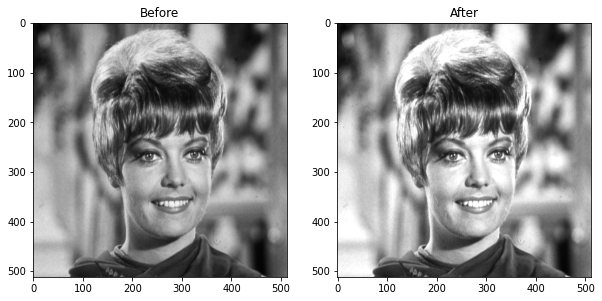

In [3]:
# Melakuan plotting untuk mencetak gambar
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(brightening1, cmap="gray")
ax[0].set_title("Before")
ax[1].imshow(brightening1_result, cmap="gray")
ax[1].set_title("After")

# Image Negatives

In [4]:
negative1 = imageio.imread("images/Lena.bmp").astype(np.float64)

# Melakukan invers pada gambar(mengahasilkan gambar invers)
negative1_result = 255 - negative1

Text(0.5, 1.0, 'After')

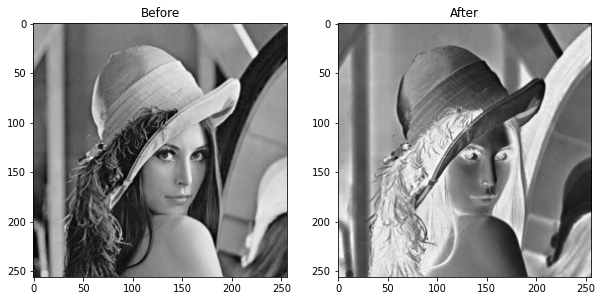

In [5]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(negative1, cmap="gray")
ax[0].set_title("Before")
ax[1].imshow(negative1_result, cmap="gray")
ax[1].set_title("After")

# Trasnformasi Log

In [6]:
log_transform_image = imageio.imread("images/beach.bmp")

# melakukan transformasi log 
log_transform_result = 100*np.log10(log_transform_image+1)

log_transform_result = np.clip(log_transform_result, 0,255)

log_transform_result = log_transform_result.astype(np.uint8)

Text(0.5, 1.0, 'After')

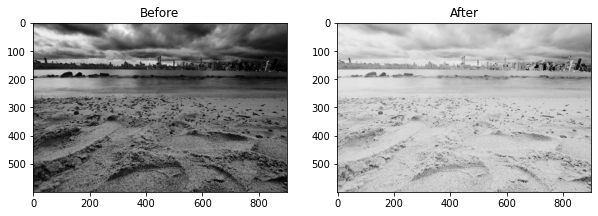

In [7]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(log_transform_image, cmap="gray")
ax[0].set_title("Before")
ax[1].imshow(log_transform_result, cmap="gray")
ax[1].set_title("After")

# Transformasi Pangkat

_$ c = 1 $ dan $ \gamma = 5 $_


In [9]:
power_transform_image = imageio.imread("images/beach.bmp")

# Mengahasilkan gambar yang melalui trasnformasi pangkat
power_transform_result = np.array(255*(power_transform_image/255) ** 5, dtype="uint8")

Text(0.5, 1.0, 'After')

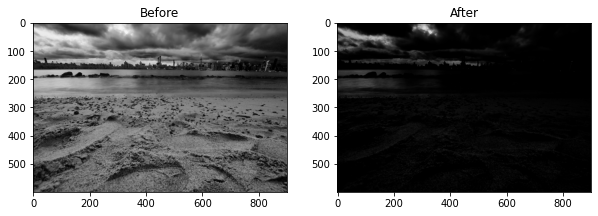

In [10]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(power_transform_image, cmap="gray")
ax[0].set_title("Before")
ax[1].imshow(power_transform_result, cmap="gray")
ax[1].set_title("After")

# Peregangan Kontras

In [12]:
# function untuk melakukan peregangan histogram
def contrast_stretch(image, lower_handler, higher_handler, beta):
    result = np.where(np.logical_and(image<lower_handler, image>=0), 0 , (np.where(np.logical_and(image>=lower_handler, image <higher_handler), beta*(image-lower_handler), (np.where(np.logical_and(image >= higher_handler, image< 256), beta*(higher_handler-lower_handler), image)))))
    return result

In [13]:
contrast_test_image = imageio.imread("images/zelda.bmp")

ct_result = contrast_stretch(contrast_test_image,50,150,2)

Text(0.5, 1.0, 'After')

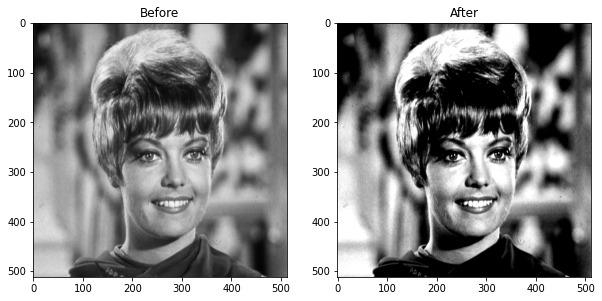

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(contrast_test_image, cmap="gray")
ax[0].set_title("Before")
ax[1].imshow(ct_result, cmap="gray")
ax[1].set_title("After")

# Gray-level Slicing

In [16]:
gls_image = imageio.imread('images/hand.png')

# MElakukan pergeseran berdasrakan nilai batas 142 dan 250
gls_result = np.where(np.logical_and(gls_image>142, gls_image<250), 255, gls_image)

Text(0.5, 1.0, 'After')

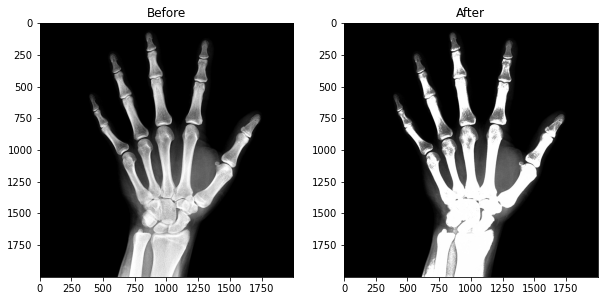

In [17]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(gls_image, cmap="gray")
ax[0].set_title("Before")
ax[1].imshow(gls_result, cmap="gray")
ax[1].set_title("After")

# Bit-plane Slicing

In [18]:
lst = []
bps_image = imageio.imread('images/camera.bmp')
    

for i in range(bps_image.shape[0]):
    for j in range(bps_image.shape[1]):
        lst.append(np.binary_repr(bps_image[i][j], width=8))

In [19]:
eight_bit_camera = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(bps_image.shape[0],bps_image.shape[1])
seven_bit_camera = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(bps_image.shape[0],bps_image.shape[1])
six_bit_camera = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(bps_image.shape[0],bps_image.shape[1])
five_bit_camera = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(bps_image.shape[0],bps_image.shape[1])
four_bit_camera = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(bps_image.shape[0],bps_image.shape[1])
three_bit_camera = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(bps_image.shape[0],bps_image.shape[1])
two_bit_camera = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(bps_image.shape[0],bps_image.shape[1])
one_bit_camera = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(bps_image.shape[0],bps_image.shape[1])

Text(0.5, 1.0, 'Bits 1')

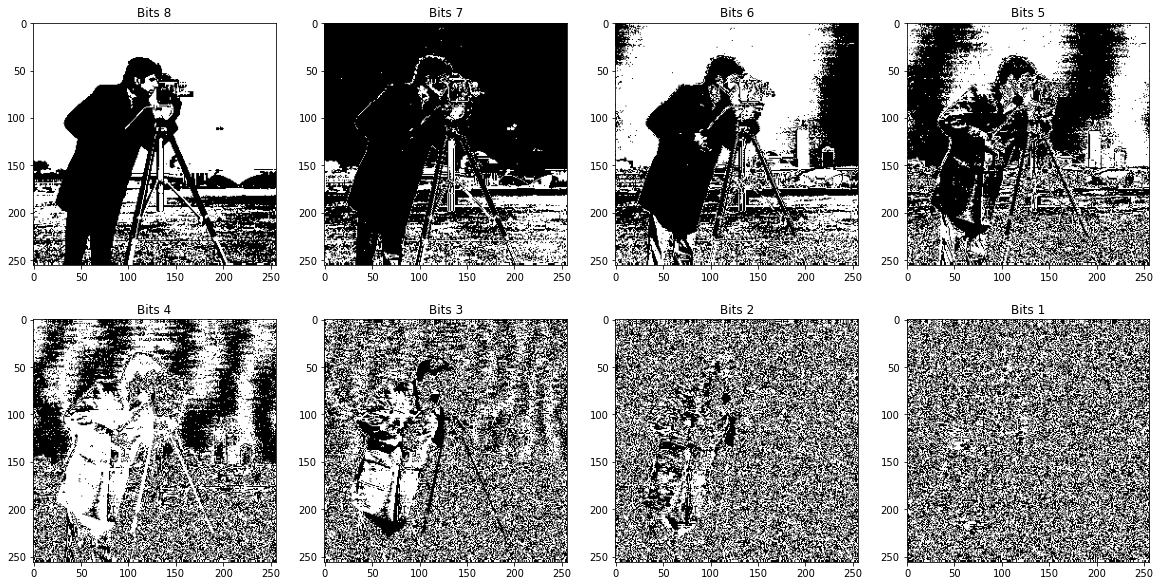

In [20]:
fig, ax = plt.subplots(2,4, figsize=(20,10))
ax[0][0].imshow(eight_bit_camera, cmap="gray")
ax[0][0].set_title("Bits 8")
ax[0][1].imshow(seven_bit_camera, cmap="gray")
ax[0][1].set_title("Bits 7")
ax[0][2].imshow(six_bit_camera, cmap="gray")
ax[0][2].set_title("Bits 6")
ax[0][3].imshow(five_bit_camera, cmap="gray")
ax[0][3].set_title("Bits 5")
ax[1][0].imshow(four_bit_camera, cmap="gray")
ax[1][0].set_title("Bits 4")
ax[1][1].imshow(three_bit_camera, cmap="gray")
ax[1][1].set_title("Bits 3")
ax[1][2].imshow(two_bit_camera, cmap="gray")
ax[1][2].set_title("Bits 2")
ax[1][3].imshow(one_bit_camera, cmap="gray")
ax[1][3].set_title("Bits 1")